In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with = engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table

Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB

session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.

dataset_latest_date = session.query(Measurement).order_by(Measurement.date.desc()).first()
print(dataset_latest_date.date)

2017-08-23


In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

import datetime as dt

one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(one_year_ago)

2016-08-23


In [12]:
# Perform a query to retrieve the data and precipitation scores

data_selection = [Measurement.date, Measurement.prcp]

data_query_results = session.query(*data_selection).filter(Measurement.date >= '2016-08-23').all()

date_prcp_list = []

for x in data_query_results:
    (m_dt, m_prcp) = x
    
    date_prcp_list.append({"date" : m_dt,
                           "prcp" : m_prcp})
    
    


In [13]:
# Save the query results as a Pandas DataFrame and set the index to the date column

date_prcp_df = pd.DataFrame(date_prcp_list, columns=['date','prcp'])
date_prcp_df = date_prcp_df.set_index("date")

# date_prcp_df.index = pd.to_datetime(date_prcp_df.index) # added this line

date_prcp_df.head(10)

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
2016-08-29,0.00
2016-08-30,0.00
2016-08-31,0.13


In [14]:
# Sort the dataframe by date

date_prcp_df = date_prcp_df.sort_values('date')
date_prcp_df

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


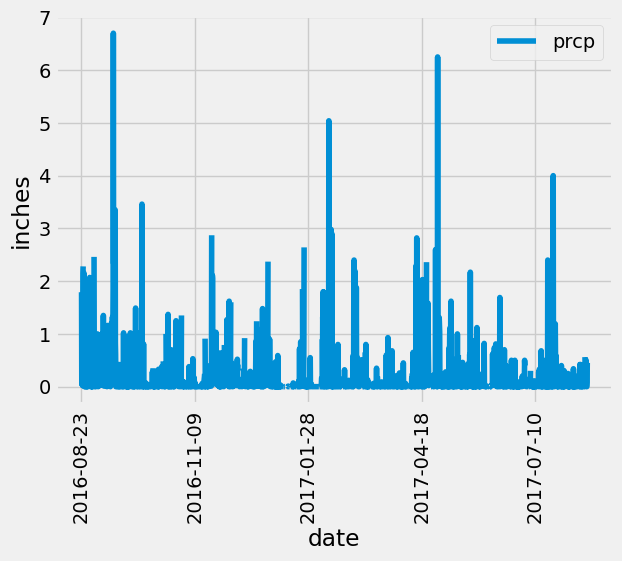

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data

date_prcp_df.plot(ylabel = "inches", rot=90, legend=True)
plt.show()

In [28]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

#dataset_latest_date += 1
#print(dataset_latest_date)

# Perform a query to retrieve the data and precipitation scores

session.query(Measurement.date).filter(Measurement.date > '2016-08-23')
#for x in dates:
 #   print(dates)

# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data




In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data

print(f"---- Summary Statistics -----" )
print(f'Precipitation Mean: {date_prcp_df["prcp"].mean()}')
print(f'Precipitation Median: {date_prcp_df["prcp"].median()}')
print(f'Precipitaion Mode: {date_prcp_df["prcp"].mode()}')

prcp_variance = np.var(date_prcp_df["prcp"], ddof=0)
print(f'Precipitation Variance: {prcp_variance}')

prcp_std = np.std(date_prcp_df["prcp"], ddof=0)
print(f'Precipitaion Standard Deviation: {prcp_std}')

---- Summary Statistics -----
Precipitation Mean: 0.17727857496288899
Precipitation Median: 0.02
Precipitaion Mode: 0    0.0
dtype: float64
Precipitation Variance: 0.21259051566664733
Precipitaion Standard Deviation: 0.4610753904370166


In [17]:
date_prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [87]:
# Design a query to calculate the total number stations in the dataset

total_stations = session.query(Station).count()
print(total_stations)

total_distinct_stations_in_measurement = session.query(Measurement.station).distinct().count()
print(total_distinct_stations_in_measurement)

9
9


In [92]:
# for the app 
# List of stations

station_names = [Station.station, Station.name]

stations_query = session.query(*station_names).all()

stations_list = []

for x in stations_query:
    (s_station, s_name) = x
    
    stations_list.append({"station" : s_station,
                           "name" : s_name})
    print(stations_list)

[{'station': 'USC00519397', 'name': 'WAIKIKI 717.2, HI US'}]
[{'station': 'USC00519397', 'name': 'WAIKIKI 717.2, HI US'}, {'station': 'USC00513117', 'name': 'KANEOHE 838.1, HI US'}]
[{'station': 'USC00519397', 'name': 'WAIKIKI 717.2, HI US'}, {'station': 'USC00513117', 'name': 'KANEOHE 838.1, HI US'}, {'station': 'USC00514830', 'name': 'KUALOA RANCH HEADQUARTERS 886.9, HI US'}]
[{'station': 'USC00519397', 'name': 'WAIKIKI 717.2, HI US'}, {'station': 'USC00513117', 'name': 'KANEOHE 838.1, HI US'}, {'station': 'USC00514830', 'name': 'KUALOA RANCH HEADQUARTERS 886.9, HI US'}, {'station': 'USC00517948', 'name': 'PEARL CITY, HI US'}]
[{'station': 'USC00519397', 'name': 'WAIKIKI 717.2, HI US'}, {'station': 'USC00513117', 'name': 'KANEOHE 838.1, HI US'}, {'station': 'USC00514830', 'name': 'KUALOA RANCH HEADQUARTERS 886.9, HI US'}, {'station': 'USC00517948', 'name': 'PEARL CITY, HI US'}, {'station': 'USC00518838', 'name': 'UPPER WAHIAWA 874.3, HI US'}]
[{'station': 'USC00519397', 'name': 'WAIK

In [39]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

most_active_stations = session.query(Measurement.station, func.count()).group_by(Measurement.station)\
                        .order_by(func.count().desc()).all()
most_active_stations

# print(f"The station with the greatest number of observations is USC00519281")

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [46]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

highest_temp = session.query(Measurement.station, func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281')\
                            .group_by(Measurement.station).all()

highest_temp

session.query(Measurement.station, func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281')\
                .group_by(Measurement.station).all()

[('USC00519281', 54.0)]

In [103]:
# For app.py only

results = session.query(Measurement.station, func.max(Measurement.tobs), func.min(Measurement.tobs),\
                            func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281')\
                            .filter(Measurement.date >= '2016-08-18').group_by(Measurement.station).all()

for x in results:
    (m_station, max_temp, min_temp, avg_temp) = x

avg_temp

73.19607843137256

In [47]:

session.query(Measurement.station, func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281')\
                .group_by(Measurement.station).all()

[('USC00519281', 54.0)]

In [60]:
# all station averages
#session.query(Measurement.station, func.avg(Measurement.tobs)).group_by(Measurement.station).all()

# most active station average temperature
station_avg_temp = session.query(Measurement.station, func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281')\
                .group_by(Measurement.station).all()

station_avg_temp

[('USC00519281', 71.66378066378067)]

In [62]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

Measurement_results = session.query(Measurement).filter(Measurement.station == 'USC00519281')\
                        .filter(Measurement.date >= '2016-08-23').all()
    
#print(Measurement_results.date)

dataset_latest_date = session.query(Measurement).filter(Measurement.station == 'USC00519281')\
                                    .order_by(Measurement.date.desc()).first()
print(dataset_latest_date.date)


2017-08-18


In [65]:
# Gather the last 12 months of observation data for most active station id

data_selection = [Measurement.date, Measurement.tobs]

last_year_obs_results = session.query(*data_selection).filter(Measurement.station == 'USC00519281')\
                                        .filter(Measurement.date >= '2016-08-18').all()

last_year_obs_list = []

for x in last_year_obs_results:
    (m_dt, m_tobs) = x
    
    last_year_obs_list.append({"date" : m_dt,
                           "tobs" : m_tobs})
    print(x)

('2016-08-18', 80.0)
('2016-08-19', 79.0)
('2016-08-20', 81.0)
('2016-08-21', 79.0)
('2016-08-22', 78.0)
('2016-08-23', 77.0)
('2016-08-24', 77.0)
('2016-08-25', 80.0)
('2016-08-26', 80.0)
('2016-08-27', 75.0)
('2016-08-28', 73.0)
('2016-08-29', 78.0)
('2016-08-30', 77.0)
('2016-08-31', 78.0)
('2016-09-01', 80.0)
('2016-09-02', 80.0)
('2016-09-03', 78.0)
('2016-09-04', 78.0)
('2016-09-05', 78.0)
('2016-09-06', 73.0)
('2016-09-07', 74.0)
('2016-09-08', 80.0)
('2016-09-09', 79.0)
('2016-09-10', 77.0)
('2016-09-11', 80.0)
('2016-09-12', 76.0)
('2016-09-13', 79.0)
('2016-09-14', 75.0)
('2016-09-15', 79.0)
('2016-09-16', 78.0)
('2016-09-17', 79.0)
('2016-09-18', 78.0)
('2016-09-19', 78.0)
('2016-09-20', 76.0)
('2016-09-21', 74.0)
('2016-09-22', 77.0)
('2016-09-23', 78.0)
('2016-09-24', 79.0)
('2016-09-25', 79.0)
('2016-09-26', 77.0)
('2016-09-27', 80.0)
('2016-09-28', 78.0)
('2016-09-29', 78.0)
('2016-09-30', 78.0)
('2016-10-01', 77.0)
('2016-10-02', 79.0)
('2016-10-03', 79.0)
('2016-10-04'

In [93]:
# For APP Development Only
# Minimum temperature for a specified date range

# data_selection = [Measurement.date, Measurement.tobs]

# last_year_obs_results = session.query(*data_selection).filter(Measurement.station == 'USC00519281')\
#                                         .filter(Measurement.date >= '2016-08-18').all()

# last_year_obs_list = []

# for x in last_year_obs_results:
#     (m_dt, m_tobs) = x
    
#     last_year_obs_list.append({"date" : m_dt,
#                            "tobs" : m_tobs})"

session.query(Measurement.station, func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281')\
             .filter(Measurement.date >= '2016-08-18').group_by(Measurement.station).all()

[('USC00519281', 59.0)]

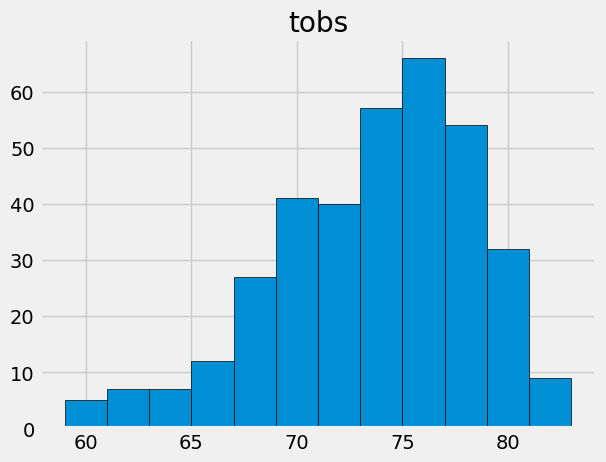

In [81]:

# Save the query results as a DataFrame and plot into histogram

most_active_station_last_year_obs = pd.DataFrame(last_year_obs_list, columns=['date','tobs'])
#most_active_station_last_year_obs = most_active_station_last_year_obs.set_index("date")

# date_prcp_df.index = pd.to_datetime(date_prcp_df.index) # added this line

most_active_station_last_year_obs

most_active_station_last_year_obs.hist(column='tobs', sharey=True, ec='black', bins=12)
plt.show()

# Close session

In [74]:
# Close Session
session.close()